# Сборный проект 1.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [277]:
import pandas as pd # подключение необходимых для проекта библиотек
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [278]:
df = pd.read_csv('/datasets/games.csv') # загрузка данных из файла

In [279]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [280]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

In [281]:
lower_columns = df.columns.str.lower() # приведение к нижнему регистру названий столбцов
df.set_axis(lower_columns, axis='columns', inplace=True)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [283]:
df.describe(percentiles=[0.02,0.2,0.9,0.99]).T # просмотр качества числовых значений в данных

,count,mean,std,min,2%,20%,50%,90%,99%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,1993.0,2002.0,2007.00,2014.00,2016.0000,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.0,0.08,0.61,2.7900,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.0,0.0,0.02,0.35,1.9386,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.0,0.00,0.17,1.2686,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.0,0.01,0.10,0.6300,10.57
critic_score,8137.0,68.967679,13.938165,13.0,36.0,58.0,71.00,85.00,94.0000,98.00


В данных есть несоответствие типов данных и пропуски. Необходимо связаться с поставщиком данных и подготовить их для дальнейшего исследования.

# Шаг 2. Подготовьте данные

In [284]:
missing_list=[] # поиск колонок данных содержащих нулевые значения
for x in df:
    if len(df[df[x].isnull()])>0:
        missing_list.append(x)
print(missing_list)

['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']


In [285]:
missing_perc=[] # процентное содержание пропусков в колонках 
for x in missing_list:
    missing_perc.append([x,(len(df[df[x].isnull()])/len(df))])
missing_perc=pd.DataFrame(missing_perc,columns=['column','missing %'])
missing_perc.sort_values(by=['missing %'],ascending=False)

,column,missing %
3,critic_score,0.513192
5,rating,0.404786
4,user_score,0.400897
1,year_of_release,0.016093
0,name,0.000120
2,genre,0.000120


In [286]:
len(missing_list)/len(df.columns) # среднее значение соотношения пропусков к полным данным

0.5454545454545454

In [287]:
df.duplicated().sum() # проверка на дубликаты

0

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [289]:
df.groupby(['rating'])['rating'].count() # классификаторы рейтинга ESRB

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: rating, dtype: int64

Классификация по рейтенгу ESRB:
* AO - («Adults Only 18+») — «Только для взрослых»
* E - («Everyone») — «Для всех»
* E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
* EC -  («Early childhood») — «Для детей младшего возраста»
* K - A - (Kids to Adults) rating category changed to E (Everyone)
* M - («Mature») — «Для взрослых»
* RP - («Rating Pending») — «Рейтинг ожидается»
* T -  («Teen») — «Подросткам»

In [290]:
df['rating'] = df['rating'].fillna('RP') # заменим пустые значения на значение RP (еще без оценки)

In [291]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E' # заменим на Е. Так как Kids to Adults перевели в Everyone 

In [292]:
df['year_of_release'] = df['year_of_release'].fillna(-1) # пустые значения в годах отметим как -1 
# для того что бы видеть, что это были пустые значения

In [293]:
df['genre'] = df['genre'].fillna('NA') # в жанрах пустые значения заменим на NA

In [294]:
df['critic_score'] = df['critic_score'].fillna(-2) # пустые оценки критиков отметим как -2 

In [295]:
df['user_score'] = df['user_score'].fillna(-3) # пустые оценки пользователей отметим как -3

In [296]:
df['name'] = df['name'].fillna('unknown') # в названиях пропуски заменим на unknown

In [297]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = '0' # значение tbd является нулем

In [298]:
df['user_score'] = df['user_score'].astype('float') # преобразование в тип float

In [299]:
df.groupby(['rating'])['rating'].count() # подсчет значений рейтинга 

rating
AO         1
E       3993
E10+    1420
EC         8
M       1563
RP      6769
T       2961
Name: rating, dtype: int64

In [300]:
df.info() # данные готовы к работе

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [301]:
df['all_players'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # суммарные продажи 

In [302]:
df.duplicated().sum() # финальная проверка на дубликаты

0

1. Пустые значения в рейтенге заменим на RP (ожидает оценки). Так же в рейтинге классификатор K - A заменим на E. Так как он был включен в классификатор E. Присутствие классификатора K - A говорит о устарелых данных в базе.
2. Пустые значения года выпуска заменим на -1 для того что бы понимать, что это пустые данные в годах выпуска.
3. Пустые значения в жанрах заменим на NA.
4. Пустые оценки критиков на -2 так же для наглядности.
5. Оценки пользователей на -3 по такому же принципу. А значения tbl (to be announced) заменим на 0. Так как tbl показывает что оценка еще не выставленна. И изменим тип значений на float для дальнейших расчетов.
6. В названиях игр заменим пропуски unknown.

 Большенство пропусков связанно с некорректной обработкой информации при вводе в базу или же связанно с ошибками при выгрузке. Следует пообщаться с поставщиком данных.

# Шаг 3. Проведите исследовательский анализ данных

In [303]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_players
5414,Teenage Mutant Ninja Turtles,GC,2003.0,Action,0.26,0.07,0.00,0.01,57.0,8.0,E,0.34
7668,Puzzle Challenge: Crosswords and More!,PSP,2006.0,Puzzle,0.18,0.00,0.00,0.01,-2.0,-3.0,RP,0.19
12821,Samurai Warriors 4: Empires,PSV,2015.0,Action,0.00,0.00,0.06,0.00,-2.0,0.0,T,0.06
2004,UFC Undisputed 3,PS3,2012.0,Action,0.55,0.32,0.03,0.13,86.0,7.4,T,1.03
787,Tetris DS,DS,2006.0,Puzzle,0.63,0.05,1.35,0.08,84.0,8.7,E,2.11


## 3.1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? (1994-2016)

In [304]:
df.groupby(['year_of_release'])['name'].count() # подсчет количества выпущенных игр по годам

year_of_release
-1.0        269
 1980.0       9
 1981.0      46
 1982.0      36
 1983.0      17
 1984.0      14
 1985.0      14
 1986.0      21
 1987.0      16
 1988.0      15
 1989.0      17
 1990.0      16
 1991.0      41
 1992.0      43
 1993.0      62
 1994.0     121
 1995.0     219
 1996.0     263
 1997.0     289
 1998.0     379
 1999.0     338
 2000.0     350
 2001.0     482
 2002.0     829
 2003.0     775
 2004.0     762
 2005.0     939
 2006.0    1006
 2007.0    1197
 2008.0    1427
 2009.0    1426
 2010.0    1255
 2011.0    1136
 2012.0     653
 2013.0     544
 2014.0     581
 2015.0     606
 2016.0     502
Name: name, dtype: int64

In [305]:
df = df.query('1994 <= year_of_release <= 2016') # для работы нам понадобится следующий временной итервал 94-16 гг

In [306]:
df.groupby(['year_of_release'])['name'].count() # подсчет игр по годам в интервале 94-16 гг

year_of_release
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Для дальнейших исследований будем использовать данные с 1994 по 2016 гг включиетльно.

## 3.2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16714
Data columns (total 12 columns):
name               16079 non-null object
platform           16079 non-null object
year_of_release    16079 non-null float64
genre              16079 non-null object
na_sales           16079 non-null float64
eu_sales           16079 non-null float64
jp_sales           16079 non-null float64
other_sales        16079 non-null float64
critic_score       16079 non-null float64
user_score         16079 non-null float64
rating             16079 non-null object
all_players        16079 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [308]:
df.groupby(['platform'])['all_players'].sum().sort_values(ascending=False) # продажи по платформам

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: all_players, dtype: float64

In [309]:
platforms = ['GB','XOne','GC','N64','XB','PC','3DS','PSP','GBA','PS4','PS','DS','Wii','PS3','X360','PS2']
# топ пратформ с наибольшими продажами

In [310]:
df = df.query('platform == @platforms') # срез по топ платформам

In [311]:
data1 = df.pivot_table('all_players', ['platform', 'year_of_release'],aggfunc=sum) # сводная по продажам

In [312]:
data1 = data1.reset_index() # обновления индексов

In [313]:
data1.head()

,platform,year_of_release,all_players
0,3DS,2011.0,63.20
1,3DS,2012.0,51.36
2,3DS,2013.0,56.57
3,3DS,2014.0,43.76
4,3DS,2015.0,27.78


Text(0.5, 1.0, 'Поведение продаж на разных игровых платформах в интервале 94-16 гг')

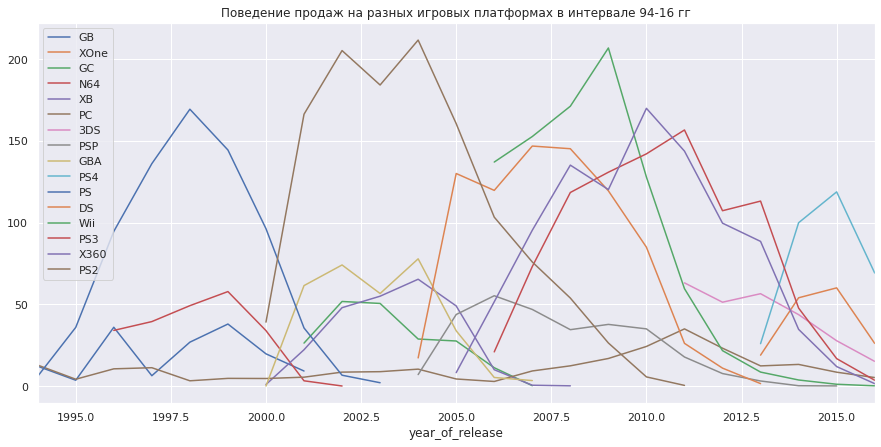

In [314]:
fig, ax = plt.subplots() # формирование тенденций продаж на разных игровых платформах и интервале времени 94-16 гг
for col in platforms:
    y = data1.query('platform == @col')
    y.plot(x = 'year_of_release', y = 'all_players', figsize=(15, 7), ax=ax)
ax.legend(platforms)   
plt.title('Поведение продаж на разных игровых платформах в интервале 94-16 гг')

В среднем жизненный цикл игровых платформ составляет 7 лет.

## 3.3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Для оценки рынка на 2017 выберем актуальный период 2010 - 2016 года.

In [315]:
df_aktual = df.query('2010 <= year_of_release <= 2016') # срез данных по актуальному периоду 10-16 гг

In [316]:
df_aktual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_players
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,-2.0,-3.0,RP,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


## 3.4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [317]:
df_aktual.groupby(['platform'])['all_players'].sum().sort_values(ascending=False)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
PSP      64.05
PS2       6.09
Name: all_players, dtype: float64

In [318]:
platforms_aktual = ['PS2' ,'PSP', 'PC' ,'DS', 'XOne', 'Wii' ,'3DS', 'PS4', 'X360' ,'PS3' ] # список топ 10 платформ

In [319]:
df_aktual = df.query('platform == @platforms_aktual') # срез по 10 топовым игровым платформам

In [320]:
df_aktual = df.pivot_table('all_players', ['platform', 'year_of_release'],aggfunc=sum) 
# сводная общих продаж по платформам и году 

In [321]:
df_aktual = df_aktual.reset_index() # сброс индексов актуальной базы

In [322]:
df_aktual.head()

,platform,year_of_release,all_players
0,3DS,2011.0,63.20
1,3DS,2012.0,51.36
2,3DS,2013.0,56.57
3,3DS,2014.0,43.76
4,3DS,2015.0,27.78


Text(0.5, 1.0, 'Поведение продаж на топ 10 игровых платформах в интервале 10-16 гг')

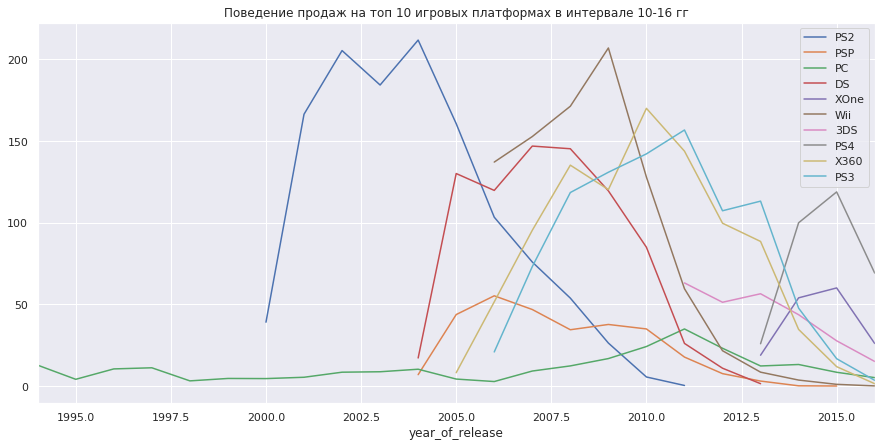

In [323]:
ax = plt.gca()
for col in platforms_aktual: # временное семество графиков продаж по игровым платформам 
    y = df_aktual.query('platform == @col')
    y.plot(x = 'year_of_release', y = 'all_players', figsize=(15, 7), ax=ax)
ax.legend(platforms_aktual)   
plt.title('Поведение продаж на топ 10 игровых платформах в интервале 10-16 гг')

Продажи по индустрии падают. XOne и PS4 в топ. Платформа PC сама долгоживущая и стабильная.

## 3.5. Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [324]:
data = df.query('2010 <= year_of_release <= 2016') # срез по актуальному периоду
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_players
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,-2.0,-3.0,RP,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


In [325]:
data_agg = data.groupby('name')['platform'].count() # группировка игр по кроссплатформенности
data_agg = pd.DataFrame(data_agg)
data_agg.reset_index(inplace=True)
data_agg.tail(1)

,name,platform
2998,uDraw Studio: Instant Artist,2


Text(0.5, 1.0, 'Распределение продаж по 9 многоплатформенным играм')

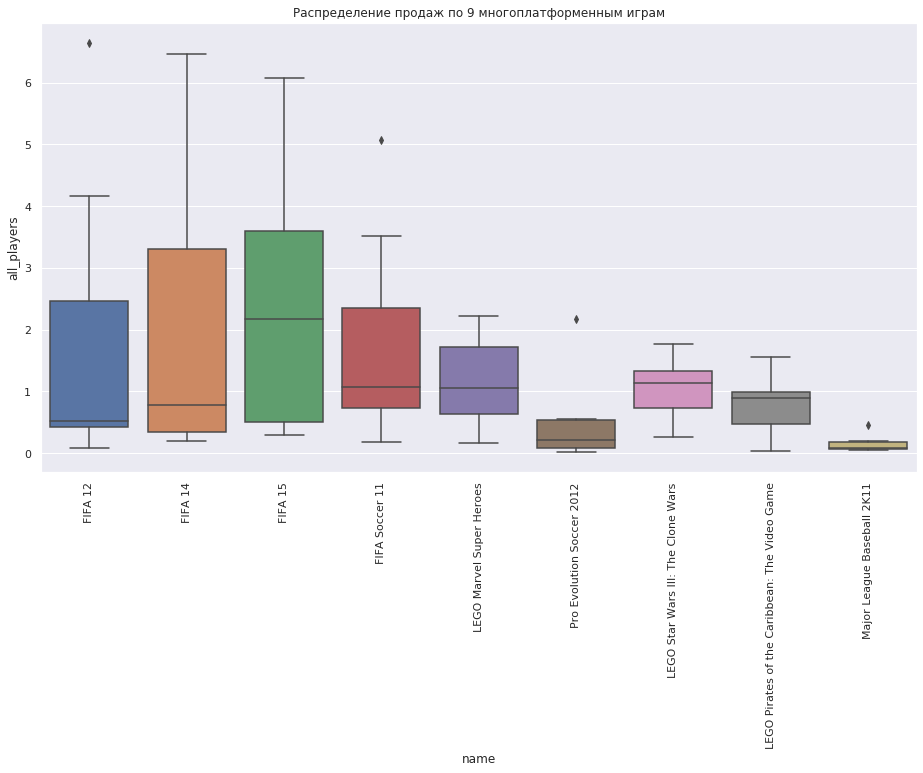

In [326]:
name_filter = data_agg.query('platform >=7')['name'].values.tolist()
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x="name", y="all_players", data=data.query('@name_filter in name'))
plt.xticks(rotation=90)
plt.title('Распределение продаж по 9 многоплатформенным играм')

1. По глобальным продажам выделяется серия игр FIFA. 
2. Среднее значение продаж находиться в диапазоне 1 миллиона долларов.
3. Топ 9 многопротформенных игр приносят прибыль от .2 до 3 миллионов долларов (в среднем 1.5 миллиона долларов) за жизненный цикл.

## 3.6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [327]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_players
14,Kinect Adventures!,X360,2010.0,Misc,15.0,4.89,0.24,1.69,61.0,6.3,E,21.82


In [328]:
df_xone = data.query('platform == @platforms_aktual[4]') # срез по XOne

Text(0.5, 1, 'Распределение продаж на платформе XOne в зависимости от оценки критиков')

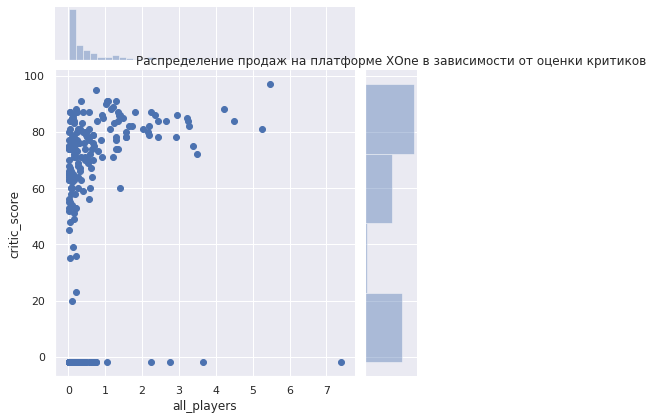

In [329]:
sns.jointplot(x='all_players', y='critic_score', data=df_xone) # построение распределения продаж относительно оценки критиков
plt.title('Распределение продаж на платформе XOne в зависимости от оценки критиков')

Text(0.5, 1, 'Распределение продаж на платформе XOne в зависимости от оценки пользователей')

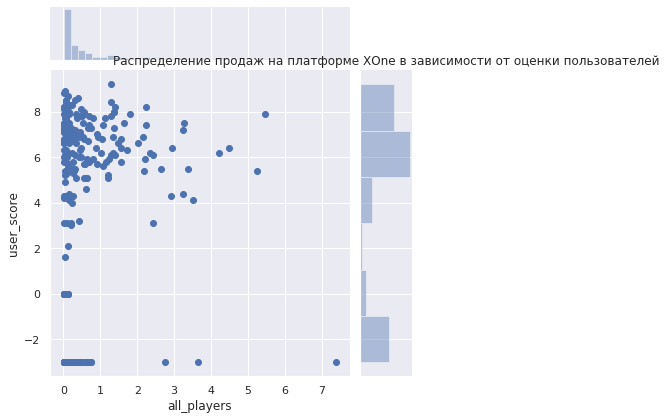

In [330]:
sns.jointplot(x='all_players', y='user_score', data=df_xone) # построение распределения продаж относительно оценки пользователей
plt.title('Распределение продаж на платформе XOne в зависимости от оценки пользователей')

In [331]:
corr = df_xone[['platform','critic_score','user_score','all_players']].corr()

Text(0.5, 1, 'Зависимость прибыли от оценки критиков и пользователей на платформе XOne')

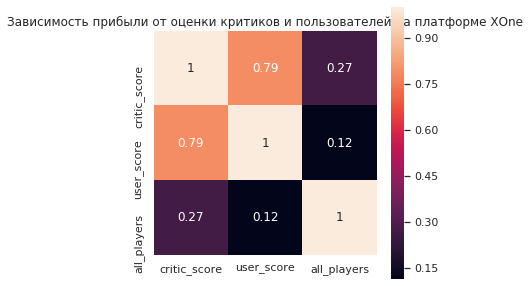

In [332]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr, square=True,annot=True)
plt.title('Зависимость прибыли от оценки критиков и пользователей на платформе XOne')

Ситуация по конкретной топовой игровой платформе:
1. Как мы видим из полученной информации отзывы критиков сильнее влияют на продажи, чем отзовы пользователей.
2. Люди больше доверяют экспертам нежели простым пользователям.
3. Мнения экспертов формируют тренды.
4. Но тем не менее корреляция ниже 0.5 говорит от небольшом положительном воздействии на продажи.

In [333]:
corr_all = data[['platform','critic_score','user_score','all_players']].corr()

Text(0.5, 1, 'Зависимость прибыли от оценки критиков и пользователей на всех игровых платформах')

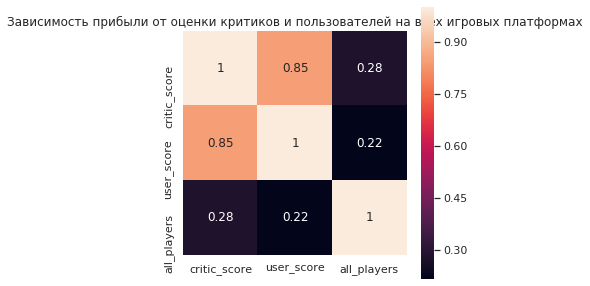

In [334]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr_all, square=True,annot=True)
plt.title('Зависимость прибыли от оценки критиков и пользователей на всех игровых платформах')

Ситуация в целом по игровым платформам уже более равномерная. Но так же наблюдается небольшая положительная тенденция в росте продаж. Оценки как экспертов так и обычных пользователей воздействуют на продажи примерно одинаково и положительно.


## 3.7. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [335]:
data_agg_genre = data.groupby('genre')['name'].count() # группировка игр по жанрам
data_agg_genre = pd.DataFrame(data_agg_genre)
data_agg_genre.reset_index(inplace=True)

In [336]:
data_agg_sum = data.groupby('genre')['all_players'].sum() # группировка продаж по жанрам
data_agg_sum = pd.DataFrame(data_agg_sum)
data_agg_sum.reset_index(inplace=True)

In [337]:
data_all = data_agg_genre.merge(data_agg_sum, on='genre') 

In [338]:
data_all['mean'] = data_all['all_players'] / data_all['name'] # средние продажи по жанрам

In [339]:
data_all.sort_values(by='all_players', axis = 0)

,genre,name,all_players,mean
5,Puzzle,107,19.10,0.178505
11,Strategy,160,34.25,0.214062
1,Adventure,467,56.99,0.122034
9,Simulation,212,71.47,0.337123
2,Fighting,178,72.70,0.408427
4,Platform,127,95.63,0.752992
6,Racing,223,112.30,0.503587
3,Misc,530,217.67,0.410698
7,Role-Playing,476,300.24,0.630756
10,Sports,544,321.04,0.590147


1. Самые прибыльные платформы Action и Shooter.
2. Разнообразие игр в жанре в среднем приносит большую прибыль.

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [340]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_players
14,Kinect Adventures!,X360,2010.0,Misc,15.0,4.89,0.24,1.69,61.0,6.3,E,21.82


In [341]:
pl_na = pd.DataFrame(data.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head()) 
# группировка локальной прибыли по игровым платформам
pl_na.reset_index(inplace=True)

In [342]:
pl_eu = pd.DataFrame(data.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по игровым платформам
pl_eu.reset_index(inplace=True)

In [343]:
pl_jp = pd.DataFrame(data.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по игровым платформам
pl_jp.reset_index(inplace=True)

### 4.1. Самые популярные платформы (топ-5).

In [344]:
pl_na # топ 5 игровых платформ Северная Америка

,platform,na_sales
0,X360,334.18
1,PS3,229.25
2,Wii,121.20
3,PS4,108.74
4,XOne,93.12


In [345]:
pl_eu # топ 5 игровых платформ Европпа

,platform,eu_sales
0,PS3,213.60
1,X360,163.41
2,PS4,141.09
3,PC,68.82
4,Wii,65.91


In [346]:
pl_jp  # топ 5 игровых платформ Япония

,platform,jp_sales
0,3DS,100.62
1,PS3,59.26
2,PSP,42.20
3,DS,27.90
4,Wii,17.75


* В целом пользователи Северной Америки и Европы очень похожи по предпочтениям игровых платформ. Япония отличается. Возможно это связанно с особым азиатским менталитетом.

In [347]:
gen_na = pd.DataFrame(data.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по жанрам
gen_na.reset_index(inplace=True)

In [348]:
gen_eu = pd.DataFrame(data.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по жанрам
gen_eu.reset_index(inplace=True)

In [349]:
gen_jp = pd.DataFrame(data.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по жанрам
gen_jp.reset_index(inplace=True)

### 4.2. Самые популярные жанры (топ-5).

In [350]:
gen_na # топ 5 жанров Северная Америка

,genre,na_sales
0,Action,277.22
1,Shooter,233.65
2,Sports,154.16
3,Misc,117.62
4,Role-Playing,108.86


In [351]:
gen_eu # топ 5 жанров Европпа

,genre,eu_sales
0,Action,222.53
1,Shooter,168.21
2,Sports,114.49
3,Role-Playing,73.43
4,Misc,61.43


In [352]:
gen_jp # топ 5 жанров Япония

,genre,jp_sales
0,Role-Playing,94.87
1,Action,64.27
2,Misc,19.53
3,Sports,13.94
4,Adventure,13.34


* По жанрам предпочтения пользоветелей Европпы и Северной Америки сходятся. Япония опять таки отличается скорее всего из за отличия культуры и азиатской ментальности.

### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Классификация по рейтенгу ESRB:
* AO - («Adults Only 18+») — «Только для взрослых»
* E - («Everyone») — «Для всех»
* E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
* EC -  («Early childhood») — «Для детей младшего возраста»
* K - A - (Kids to Adults) rating category changed to E (Everyone)
* M - («Mature») — «Для взрослых»
* RP - («Rating Pending») — «Рейтинг ожидается»
* T -  («Teen») — «Подросткам»

rating,E,E10+,EC,M,RP,T
count,528.000000,288.000000,3.000000,305.000000,1524.000000,483.000000
mean,0.480739,0.507639,0.376667,1.234295,0.096450,0.321387
std,1.127837,0.980502,0.051316,2.565536,0.553236,0.609296
min,0.000000,0.000000,0.320000,0.000000,0.000000,0.000000
25%,0.047500,0.057500,0.355000,0.080000,0.000000,0.030000
50%,0.130000,0.150000,0.390000,0.420000,0.000000,0.110000
75%,0.382500,0.470000,0.405000,1.210000,0.000000,0.355000
max,15.000000,7.750000,0.420000,23.840000,12.250000,6.620000


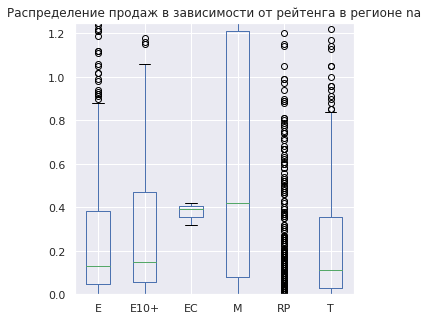

In [353]:
plt.ylim(0,1.25)
data_raiting_na = data.pivot_table(index='name',columns='rating',values='na_sales',aggfunc='sum')
data_raiting_na.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в регионе na')
data_raiting_na.describe()

rating,E,E10+,EC,M,RP,T
count,528.000000,288.000000,3.0,305.000000,1524.000000,483.000000
mean,0.349545,0.308681,0.0,0.943934,0.087100,0.225487
std,1.174861,0.615109,0.0,2.032603,0.486361,0.439062
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.010000,0.0,0.050000,0.000000,0.010000
50%,0.050000,0.060000,0.0,0.320000,0.000000,0.070000
75%,0.210000,0.250000,0.0,0.970000,0.020000,0.230000
max,11.670000,3.700000,0.0,23.420000,9.490000,3.980000


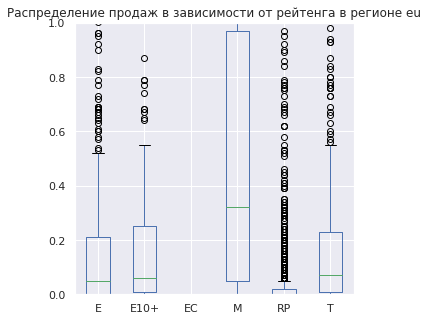

In [354]:
plt.ylim(0,1)
data_raiting_eu = data.pivot_table(index='name',columns='rating',values='eu_sales',aggfunc='sum')
data_raiting_eu.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в регионе eu')
data_raiting_eu.describe()

rating,E,E10+,EC,M,RP,T
count,528.000000,288.000000,3.0,305.000000,1524.000000,483.000000
mean,0.077254,0.035174,0.0,0.092492,0.102073,0.073706
std,0.328032,0.100497,0.0,0.164726,0.340730,0.184793
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.030000,0.030000,0.000000
75%,0.000000,0.010000,0.0,0.100000,0.080000,0.080000
max,4.390000,0.790000,0.0,1.420000,5.650000,2.620000


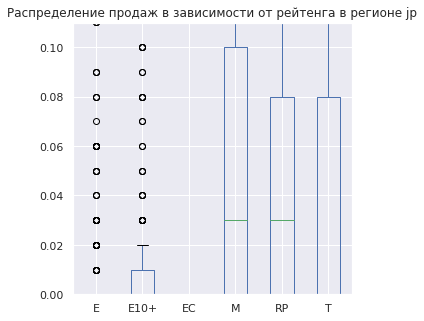

In [355]:
plt.ylim(0,0.11)
data_raiting_jp = data.pivot_table(index='name',columns='rating',values='jp_sales',aggfunc='sum')
data_raiting_jp.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в регионе jp')
data_raiting_jp.describe()

* В целом в Европпе и Северной америке похожая ситуация по продажам в сетке рейтинга, а у Японии больше продаж игр для тинейджеров.
* В японии тинейджеры больше увлекаються компьютерными играми и скорее всего это ролевые игры.

# Шаг 5. Проверьте гипотезы

In [356]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_players
14,Kinect Adventures!,X360,2010.0,Misc,15.0,4.89,0.24,1.69,61.0,6.3,E,21.82


* Центральные предельные теоремы (ЦПТ) — класс теорем в теории вероятностей, утверждающих, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

Основанием для проверки гипотез возмем ЦПТ.

In [357]:
def bootstrap(arr,n=100,N_TRIAL = 1000,func = np.mean): # функция для моделирования эксперимента
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

## 5.1. Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [358]:
res_xone = bootstrap(data.query('platform=="XOne"')['user_score'],N_TRIAL = 3000) # распределение по Xbox One

In [359]:
res_pc = bootstrap(data.query('platform=="PC"')['user_score'],N_TRIAL = 3000) # распределение по PC

Text(0.5, 1.0, 'Множества распределений пользовательских рейтенгов по XOne и PC')

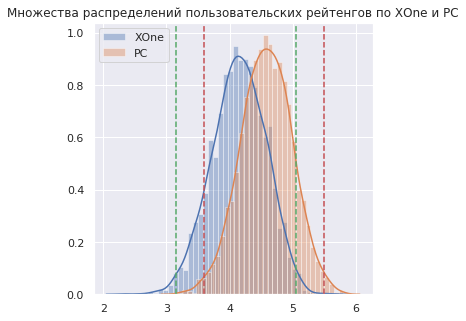

In [360]:
ax = sns.distplot(res_xone, label = 'XOne') # формирование распределений проведенных моделирований
sns.distplot(res_pc,ax = ax, label = 'PC')
ax.legend(['XOne','PC'])
ax.axvline(np.percentile(res_xone,1),linestyle = '--',color='g')
ax.axvline(np.percentile(res_xone,99),linestyle = '--',color='g')
ax.axvline(np.percentile(res_pc,1),linestyle = '--',color='r')
ax.axvline(np.percentile(res_pc,99),linestyle = '--',color='r')
plt.title('Множества распределений пользовательских рейтенгов по XOne и PC')

Гипотеза 1 верна.

## 5.2. Гипотеза 2: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [361]:
res_action = bootstrap(data.query('genre=="Action"')['user_score'],N_TRIAL = 3000) # распределение по жанру Action

In [362]:
res_sports = bootstrap(data.query('genre=="Sports"')['user_score'],N_TRIAL = 3000) # распределение по жанру Sports

Text(0.5, 1.0, 'Множества распределений пользовательских рейтенгов по жанрам Action и Sports')

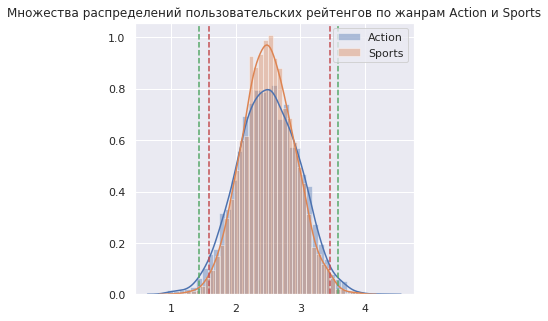

In [363]:
ax = sns.distplot(res_action, label = 'Action') # формирование распределений проведенных моделирований
sns.distplot(res_sports,ax = ax, label = 'Sports')
ax.legend(['Action','Sports'])
ax.axvline(np.percentile(res_action,1),linestyle = '--',color='g')
ax.axvline(np.percentile(res_action,99),linestyle = '--',color='g')
ax.axvline(np.percentile(res_sports,1),linestyle = '--',color='r')
ax.axvline(np.percentile(res_sports,99),linestyle = '--',color='r')
plt.title('Множества распределений пользовательских рейтенгов по жанрам Action и Sports')

Гипотеза 2 не верна.

* Основания для выбранной модели эксперимента центральная предельная теорема.
* Критерий соответстия для гипотез: визуальное пересечение распределений более чем на 50%

In [364]:
from scipy import stats as st
import numpy as np

In [365]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_players
14,Kinect Adventures!,X360,2010.0,Misc,15.0,4.89,0.24,1.69,61.0,6.3,E,21.82


Обе гипотезы о равенстве двух средних генеральных совокупностей.

### Гипотеза 1

Формулировка нулевой гипотезы H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исходя из H₀ формулируем альтернативну гипотезу H₁: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.
* Альтернативная гипотеза является двухсторонней

In [366]:
user_score_xone = data.query('platform=="XOne"')['user_score'].loc[(data['user_score'] != -3)&(data['user_score'] != 0)]
# слез по платформе XOne и фильтр от -3 и 0 значений

In [367]:
user_score_pc = data.query('platform=="PC"')['user_score'].loc[(data['user_score'] != -3)&(data['user_score'] != 0)]
# слез по платформе PC и фильтр от -3 и 0 значений

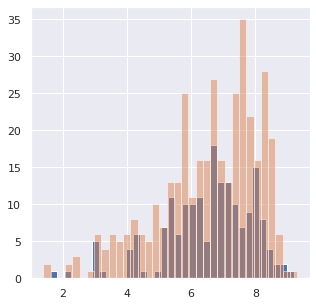

In [368]:
user_score_xone.hist(bins=35)
user_score_pc.hist(bins=35,alpha=0.5)

In [369]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    user_score_xone, 
    user_score_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.980998110649032
Не получилось отвергнуть нулевую гипотезу


* Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Вывод: рейтинги пользователей двух платформ останутся одинаковыми.

### Гипотеза 2

Формулировка нулевой гипотезы H₀: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

Исходя из H₀ формулируем альтернативну гипотезу H₁: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
* Альтернативная гипотеза является двухсторонней

In [370]:
user_score_action = data.query('genre=="Action"')['user_score'].loc[(data['user_score'] != -3)&(data['user_score'] != 0)]
# слез по жанру Action и фильтр от -3 и 0 значений

In [371]:
user_score_sports = data.query('genre=="Sports"')['user_score'].loc[(data['user_score'] != -3)&(data['user_score'] != 0)]
# слез по жанру Sports и фильтр от -3 и 0 значений

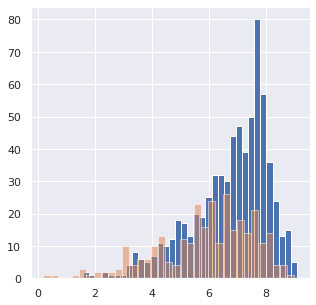

In [372]:
user_score_action.hist(bins=35)
user_score_sports.hist(bins=35,alpha=0.5)

In [373]:
results = st.ttest_ind(
    user_score_action, 
    user_score_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.4300506380035e-17
Отвергаем нулевую гипотезу


* Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

Вывод: рейтинги пользователей жанров Action (англ. «действие») и Sports (англ. «виды спорта») остануться разными.

# Шаг 6. Общий вывод:

Text(0.5, 1.0, 'Поведение продаж на топ 10 игровых платформах в интервале 10-16 гг')

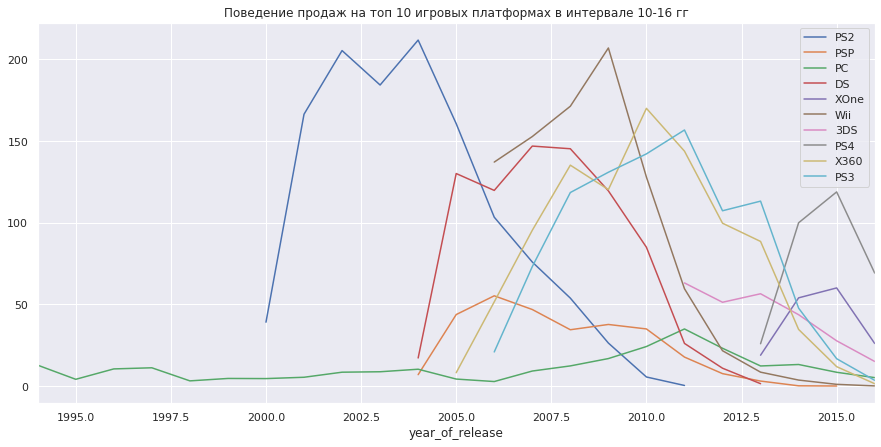

In [374]:
ax = plt.gca()
for col in platforms_aktual: # временное семество графиков продаж по игровым платформам 
    y = df_aktual.query('platform == @col')
    y.plot(x = 'year_of_release', y = 'all_players', figsize=(15, 7), ax=ax)
ax.legend(platforms_aktual)   
plt.title('Поведение продаж на топ 10 игровых платформах в интервале 10-16 гг')

Text(0.5, 1.0, 'Распределение продаж по 9 многоплатформенным играм')

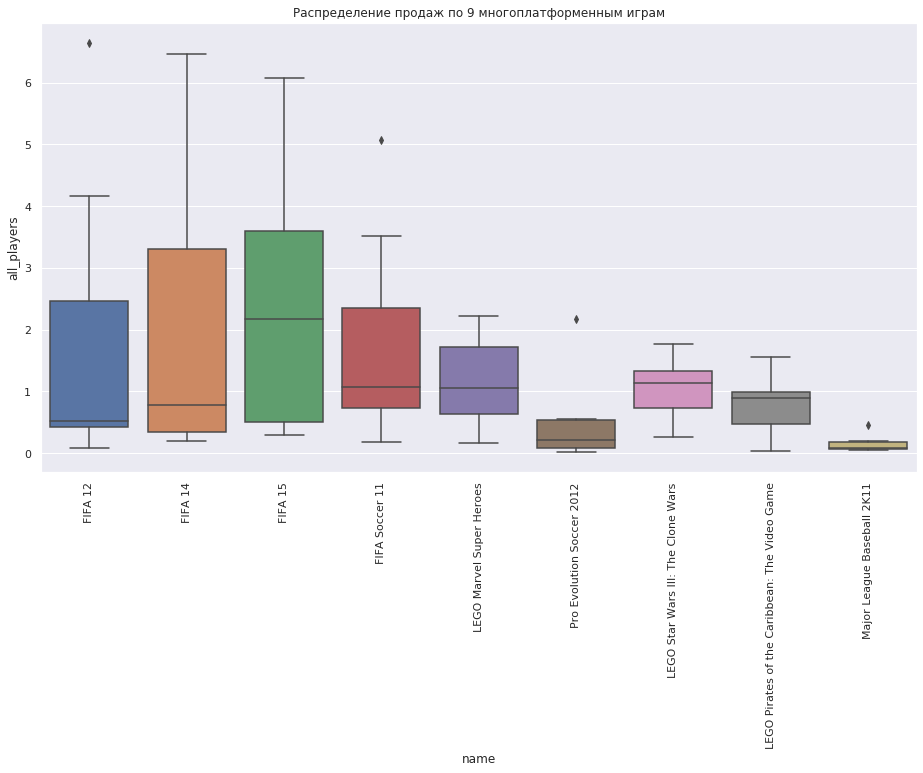

In [375]:
name_filter = data_agg.query('platform >=7')['name'].values.tolist()
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x="name", y="all_players", data=data.query('@name_filter in name'))
plt.xticks(rotation=90)
plt.title('Распределение продаж по 9 многоплатформенным играм')

* Средняя продолжительность жизненного цикла игровой платформы 7 лет.
* Продажи по индустрии падают. XOne и PS4 наиболее перспективны. Платформа PC сама долгоживущая и стабильная.
* По глобальным продажам выделяется серия игр FIFA. 
* Среднее значение продаж находиться в диапазоне 1 миллиона долларов.
* Топ 9 многопротформенных игр приносят прибыль от .2 до 3 миллионов долларов (в среднем 1.5 миллиона долларов) за жизненный цикл.

Text(0.5, 1, 'Зависимость прибыли от оценки критиков и пользователей на платформе XOne')

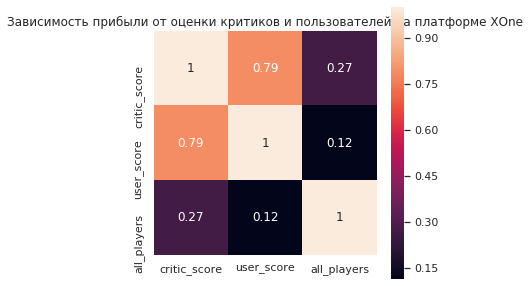

In [376]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr, square=True,annot=True)
plt.title('Зависимость прибыли от оценки критиков и пользователей на платформе XOne')

Ситуация по конкретной топовой игровой платформе:
    * Как мы видим из полученной информации отзывы критиков сильнее влияют на продажи, чем отзовы пользователей.
    * Люди больше доверяют экспертам нежели простым пользователям.
    * Мнения экспертов формируют тренды.
    * Но тем не менее корреляция ниже 0.5 говорит от небольшом положительном воздействии на продажи.

Text(0.5, 1, 'Зависимость прибыли от оценки критиков и пользователей на всех игровых платформах')

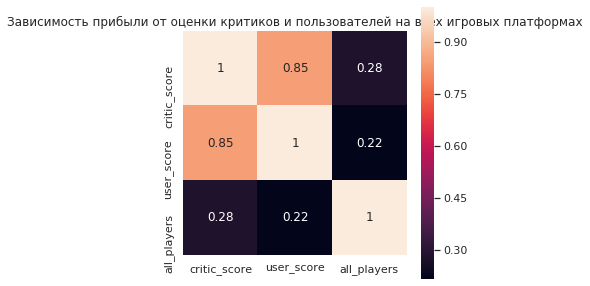

In [377]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr_all, square=True,annot=True)
plt.title('Зависимость прибыли от оценки критиков и пользователей на всех игровых платформах')

* Ситуация в целом по игровым платформам уже более равномерная. Но так же наблюдается небольшая положительная тенденция в росте продаж. Оценки как экспертов так и обычных пользователей воздействуют на продажи примерно одинаково и положительно.

In [378]:
data_all.sort_values(by='all_players', axis = 0)

,genre,name,all_players,mean
5,Puzzle,107,19.10,0.178505
11,Strategy,160,34.25,0.214062
1,Adventure,467,56.99,0.122034
9,Simulation,212,71.47,0.337123
2,Fighting,178,72.70,0.408427
4,Platform,127,95.63,0.752992
6,Racing,223,112.30,0.503587
3,Misc,530,217.67,0.410698
7,Role-Playing,476,300.24,0.630756
10,Sports,544,321.04,0.590147


* Самые прибыльные жанры Action и Shooter.
* Разнообразие игр в жанре в среднем приносит большую прибыль.

In [379]:
pl_na

,platform,na_sales
0,X360,334.18
1,PS3,229.25
2,Wii,121.20
3,PS4,108.74
4,XOne,93.12


In [380]:
pl_eu

,platform,eu_sales
0,PS3,213.60
1,X360,163.41
2,PS4,141.09
3,PC,68.82
4,Wii,65.91


In [381]:
pl_jp

,platform,jp_sales
0,3DS,100.62
1,PS3,59.26
2,PSP,42.20
3,DS,27.90
4,Wii,17.75


* В целом пользователи Северной Америки и Европы очень похожи по предпочтениям игровых платформ. Япония отличается. Возможно это связанно с особым азиатским менталитетом.

In [382]:
gen_na

,genre,na_sales
0,Action,277.22
1,Shooter,233.65
2,Sports,154.16
3,Misc,117.62
4,Role-Playing,108.86


In [383]:
gen_eu

,genre,eu_sales
0,Action,222.53
1,Shooter,168.21
2,Sports,114.49
3,Role-Playing,73.43
4,Misc,61.43


In [384]:
gen_jp

,genre,jp_sales
0,Role-Playing,94.87
1,Action,64.27
2,Misc,19.53
3,Sports,13.94
4,Adventure,13.34


* По жанрам предпочтения пользоветелей Европпы и Северной Америки сходятся. Япония опять таки отличается скорее всего из за отличия культуры и азиатской ментальности.

Text(0.5, 1.0, 'Распределение продаж в зависимости от рейтенга в Серевной Америке')

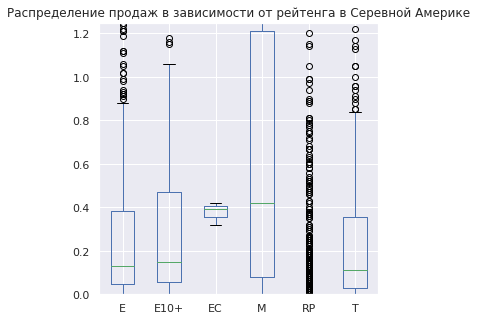

In [385]:
plt.ylim(0,1.25)
data_raiting_na.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в Серевной Америке')

Text(0.5, 1.0, 'Распределение продаж в зависимости от рейтенга в регионе Европпа')

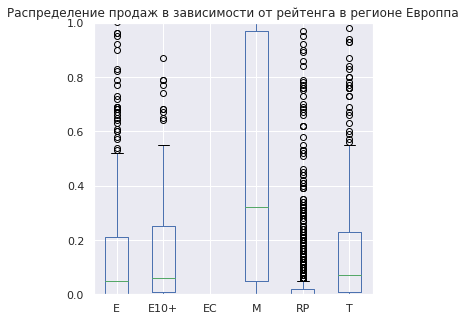

In [386]:
plt.ylim(0,1)
data_raiting_eu.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в регионе Европпа')

Text(0.5, 1.0, 'Распределение продаж в зависимости от рейтенга в регионе jp')

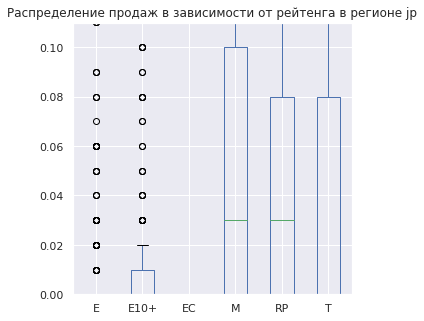

In [387]:
plt.ylim(0,0.11)
data_raiting_jp.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в регионе jp')

* В целом в Европпе и Северной америке похожая ситуация по продажам в сетке рейтинга, а у Японии больше продаж игр для тинейджеров.
* В японии тинейджеры больше увлекаються компьютерными играми и скорее всего это ролевые игры.

Text(0.5, 1.0, 'Множества распределений пользовательских рейтенгов по XOne и PC')

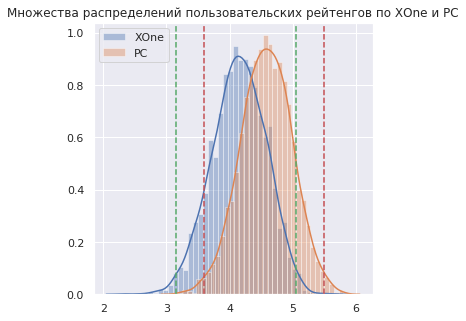

In [388]:
ax = sns.distplot(res_xone, label = 'XOne') # формирование распределений проведенных моделирований
sns.distplot(res_pc,ax = ax, label = 'PC')
ax.legend(['XOne','PC'])
ax.axvline(np.percentile(res_xone,1),linestyle = '--',color='g')
ax.axvline(np.percentile(res_xone,99),linestyle = '--',color='g')
ax.axvline(np.percentile(res_pc,1),linestyle = '--',color='r')
ax.axvline(np.percentile(res_pc,99),linestyle = '--',color='r')
plt.title('Множества распределений пользовательских рейтенгов по XOne и PC')

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Text(0.5, 1.0, 'Множества распределений пользовательских рейтенгов по жанрам Action и Sports')

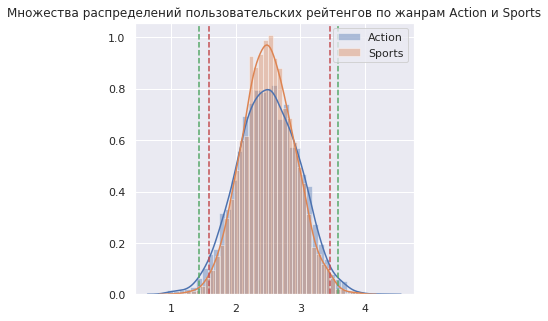

In [389]:
ax = sns.distplot(res_action, label = 'Action') # формирование распределений проведенных моделирований
sns.distplot(res_sports,ax = ax, label = 'Sports')
ax.legend(['Action','Sports'])
ax.axvline(np.percentile(res_action,1),linestyle = '--',color='g')
ax.axvline(np.percentile(res_action,99),linestyle = '--',color='g')
ax.axvline(np.percentile(res_sports,1),linestyle = '--',color='r')
ax.axvline(np.percentile(res_sports,99),linestyle = '--',color='r')
plt.title('Множества распределений пользовательских рейтенгов по жанрам Action и Sports')

* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

Рекомендации для бизнеса:
1. Разработка игр для платформ XOne и PS4 наибоеле прибыльна по миру.
2. Оценки критиков больше влияют на популярность и как следствие на прибыль. Маркетологам и рекламщикам необходимо обратить внимание на работу с критиками.
3. Sports, Role-Playing и Platform приносят больше прибыли за одну игру в среднем.
4. Action и Shooter прибыльные жанры если выпускается серия игр.
5. Для Северной Америки и Европы прибыльнее делать игры жанра Action на платформах PS3 и X360 с класификацией по ESRB:M
6. Для Японии прибыльнее делать игры жанра Role-Playing на платформах 3DS и PS3 с класификацией по ESRB:M и T
7. Рейтинги пользователей игровых платформ XOne и PC останутся одинаковыми.
8. Пользовательские рейтенги по жанрам Action и Sports останутся разными.